In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [19]:
file_path = 'site_562320250518223622.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
data

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,RH,WS,WD,SR,BP,AT
0,01-01-2024 00:00,02-01-2024 00:00,61.45,NaN,0.53,2.80,1.70,NaN,3.19,0.95,...,NaN,NaN,NaN,NaN,75.23,0.56,201.77,0.0,967.69,25.17
1,02-01-2024 00:00,03-01-2024 00:00,72.78,NaN,1.85,2.98,3.32,3.59,3.25,1.07,...,NaN,NaN,NaN,NaN,75.95,0.59,184.10,0.0,967.01,25.04
2,03-01-2024 00:00,04-01-2024 00:00,64.04,NaN,3.17,2.73,5.18,3.39,3.00,1.12,...,NaN,NaN,NaN,NaN,78.85,0.55,188.62,0.0,966.71,24.67
3,04-01-2024 00:00,05-01-2024 00:00,45.69,NaN,3.10,2.24,4.71,3.21,3.50,1.00,...,NaN,NaN,NaN,NaN,82.05,0.72,188.42,0.0,966.51,24.56
4,05-01-2024 00:00,06-01-2024 00:00,40.67,NaN,3.40,2.10,4.96,3.21,3.58,1.02,...,NaN,NaN,NaN,NaN,93.94,0.69,235.60,0.0,966.44,22.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,14-05-2025 00:00,15-05-2025 00:00,23.51,31.40,3.13,7.09,2.23,8.20,4.25,NaN,...,NaN,NaN,NaN,NaN,79.15,0.76,216.78,0.0,961.71,28.34
500,15-05-2025 00:00,16-05-2025 00:00,21.16,28.48,3.33,7.06,2.45,8.19,4.09,NaN,...,NaN,NaN,NaN,NaN,79.72,0.69,216.18,0.0,962.25,28.48
501,16-05-2025 00:00,17-05-2025 00:00,21.84,29.32,3.18,6.98,2.20,8.21,4.05,NaN,...,NaN,NaN,NaN,NaN,72.65,0.71,213.45,0.0,961.82,29.29
502,17-05-2025 00:00,18-05-2025 00:00,26.55,35.16,3.40,7.05,2.55,8.15,4.49,NaN,...,NaN,NaN,NaN,NaN,78.77,0.59,200.12,0.0,961.79,28.34


In [20]:
data['From Date'] = pd.to_datetime(data['From Date'], dayfirst=True, errors='coerce')
data.set_index('From Date', inplace=True)

In [21]:
data

,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,02-01-2024 00:00,61.45,NaN,0.53,2.80,1.70,NaN,3.19,0.95,4.05,...,NaN,NaN,NaN,NaN,75.23,0.56,201.77,0.0,967.69,25.17
2024-01-02,03-01-2024 00:00,72.78,NaN,1.85,2.98,3.32,3.59,3.25,1.07,4.12,...,NaN,NaN,NaN,NaN,75.95,0.59,184.10,0.0,967.01,25.04
2024-01-03,04-01-2024 00:00,64.04,NaN,3.17,2.73,5.18,3.39,3.00,1.12,4.21,...,NaN,NaN,NaN,NaN,78.85,0.55,188.62,0.0,966.71,24.67
2024-01-04,05-01-2024 00:00,45.69,NaN,3.10,2.24,4.71,3.21,3.50,1.00,4.15,...,NaN,NaN,NaN,NaN,82.05,0.72,188.42,0.0,966.51,24.56
2024-01-05,06-01-2024 00:00,40.67,NaN,3.40,2.10,4.96,3.21,3.58,1.02,4.17,...,NaN,NaN,NaN,NaN,93.94,0.69,235.60,0.0,966.44,22.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14,15-05-2025 00:00,23.51,31.40,3.13,7.09,2.23,8.20,4.25,NaN,NaN,...,NaN,NaN,NaN,NaN,79.15,0.76,216.78,0.0,961.71,28.34
2025-05-15,16-05-2025 00:00,21.16,28.48,3.33,7.06,2.45,8.19,4.09,NaN,NaN,...,NaN,NaN,NaN,NaN,79.72,0.69,216.18,0.0,962.25,28.48
2025-05-16,17-05-2025 00:00,21.84,29.32,3.18,6.98,2.20,8.21,4.05,NaN,NaN,...,NaN,NaN,NaN,NaN,72.65,0.71,213.45,0.0,961.82,29.29


In [22]:
features = ['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS', 'WD', 'BP', 'AT']
target = 'PM2.5'  # Predicting PM2.5 (adjustable)
data = data[features]
data

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,BP,AT
From Date,,,,,,,,,,,,,
2024-01-01,61.45,0.53,2.80,1.70,NaN,3.19,0.95,4.05,75.23,0.56,201.77,967.69,25.17
2024-01-02,72.78,1.85,2.98,3.32,3.59,3.25,1.07,4.12,75.95,0.59,184.10,967.01,25.04
2024-01-03,64.04,3.17,2.73,5.18,3.39,3.00,1.12,4.21,78.85,0.55,188.62,966.71,24.67
2024-01-04,45.69,3.10,2.24,4.71,3.21,3.50,1.00,4.15,82.05,0.72,188.42,966.51,24.56
2024-01-05,40.67,3.40,2.10,4.96,3.21,3.58,1.02,4.17,93.94,0.69,235.60,966.44,22.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14,23.51,3.13,7.09,2.23,8.20,4.25,NaN,NaN,79.15,0.76,216.78,961.71,28.34
2025-05-15,21.16,3.33,7.06,2.45,8.19,4.09,NaN,NaN,79.72,0.69,216.18,962.25,28.48
2025-05-16,21.84,3.18,6.98,2.20,8.21,4.05,NaN,NaN,72.65,0.71,213.45,961.82,29.29


In [23]:
data = data.replace('None', np.nan)
data = data.dropna(how='all')
data = data.interpolate(method='linear', limit_direction='both')
data = data.fillna(method='ffill')
data

C:\Users\gauth\AppData\Local\Temp\ipykernel_28972\1396799683.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,BP,AT
From Date,,,,,,,,,,,,,
2024-01-01,61.45,0.53,2.80,1.70,3.59,3.19,0.95,4.05,75.23,0.56,201.77,967.69,25.17
2024-01-02,72.78,1.85,2.98,3.32,3.59,3.25,1.07,4.12,75.95,0.59,184.10,967.01,25.04
2024-01-03,64.04,3.17,2.73,5.18,3.39,3.00,1.12,4.21,78.85,0.55,188.62,966.71,24.67
2024-01-04,45.69,3.10,2.24,4.71,3.21,3.50,1.00,4.15,82.05,0.72,188.42,966.51,24.56
2024-01-05,40.67,3.40,2.10,4.96,3.21,3.58,1.02,4.17,93.94,0.69,235.60,966.44,22.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14,23.51,3.13,7.09,2.23,8.20,4.25,0.00,10.81,79.15,0.76,216.78,961.71,28.34
2025-05-15,21.16,3.33,7.06,2.45,8.19,4.09,0.00,10.81,79.72,0.69,216.18,962.25,28.48
2025-05-16,21.84,3.18,6.98,2.20,8.21,4.05,0.00,10.81,72.65,0.71,213.45,961.82,29.29


In [24]:
data = data.astype(float)

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [26]:
def create_sequences(data, seq_length, feature_cols, target_col):
    X, y = [], []
    feature_idx = [data.columns.get_loc(col) for col in feature_cols]
    target_idx = data.columns.get_loc(target_col)
    
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length, feature_idx].values)
        y.append(data.iloc[i + seq_length, target_idx])
    return np.array(X), np.array(y)

seq_length = 3  # 7-day lookback for daily data
X, y = create_sequences(scaled_df, seq_length, features, target)
X

array([[[0.67278182, 0.        , 0.12717292, ..., 0.64919144,
         0.78231293, 0.16638274],
        [0.80350756, 0.03194579, 0.13540714, ..., 0.53397235,
         0.73091459, 0.15900057],
        [0.70266528, 0.06389158, 0.12397072, ..., 0.56344549,
         0.70823885, 0.13798978]],

       [[0.80350756, 0.03194579, 0.13540714, ..., 0.53397235,
         0.73091459, 0.15900057],
        [0.70266528, 0.06389158, 0.12397072, ..., 0.56344549,
         0.70823885, 0.13798978],
        [0.49094266, 0.06219748, 0.10155535, ..., 0.56214137,
         0.69312169, 0.13174333]],

       [[0.70266528, 0.06389158, 0.12397072, ..., 0.56344549,
         0.70823885, 0.13798978],
        [0.49094266, 0.06219748, 0.10155535, ..., 0.56214137,
         0.69312169, 0.13174333],
        [0.43302181, 0.06945789, 0.09515096, ..., 0.86978352,
         0.68783069, 0.01419648]],

       ...,

       [[0.1787239 , 0.05856728, 0.32387923, ..., 0.74810902,
         0.29478458, 0.45599091],
        [0.23502942, 

In [27]:
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size


In [28]:
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

In [29]:
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (336, 3, 13), Validation set: (72, 3, 13), Test set: (72, 3, 13)


In [30]:
data.to_csv('cleaned_air_quality.csv')

# Save sequences
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

# Save scaler for inverse transformation
import joblib
joblib.dump(scaler, 'scaler.pkl')

# Optional: Plot PM2.5 to visualize
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PM2.5'], label='PM2.5')
plt.title('PM2.5 Daily Values')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.savefig('pm25_plot.png')
plt.close()

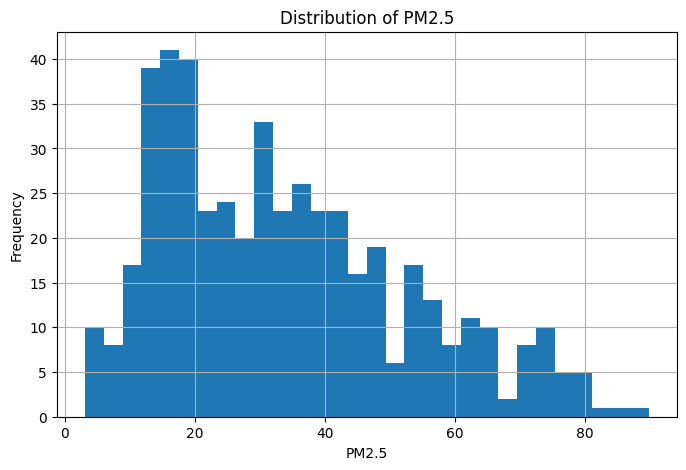

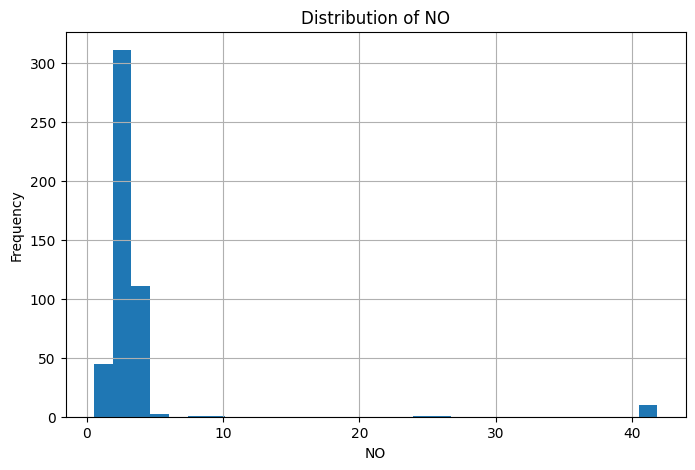

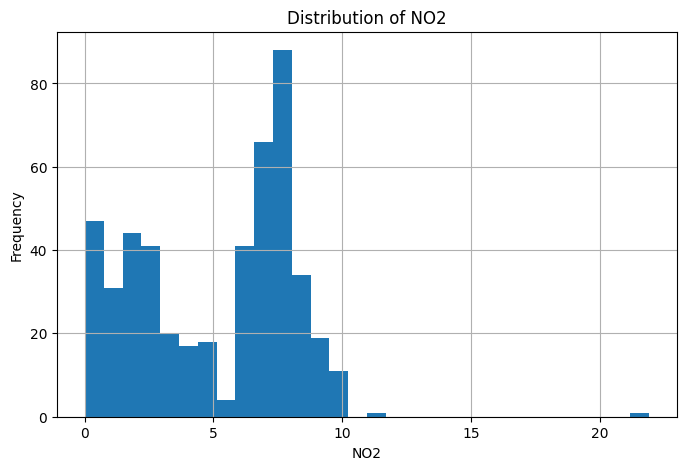

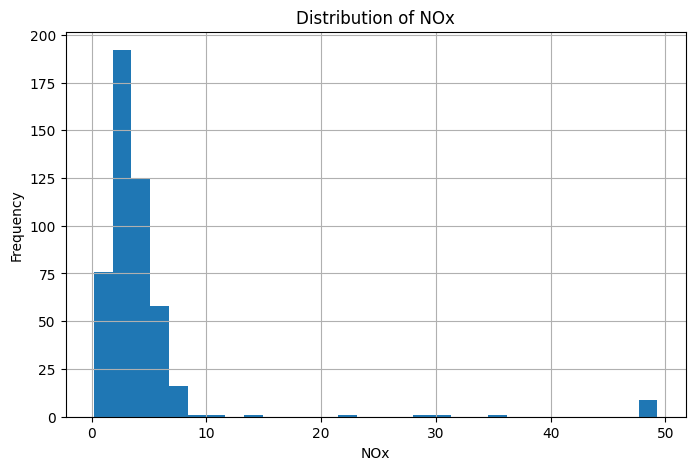

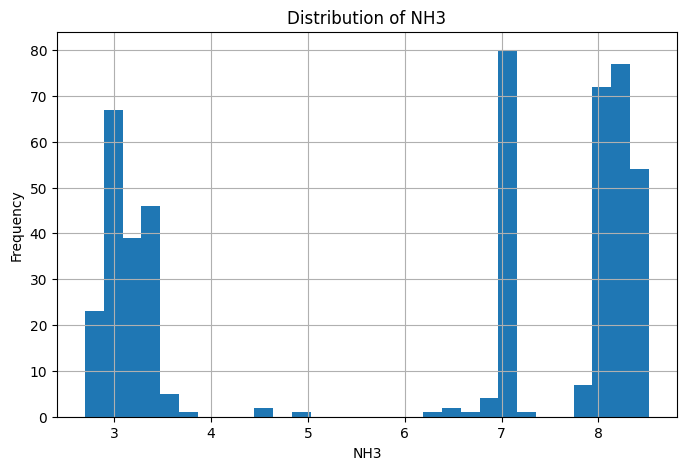

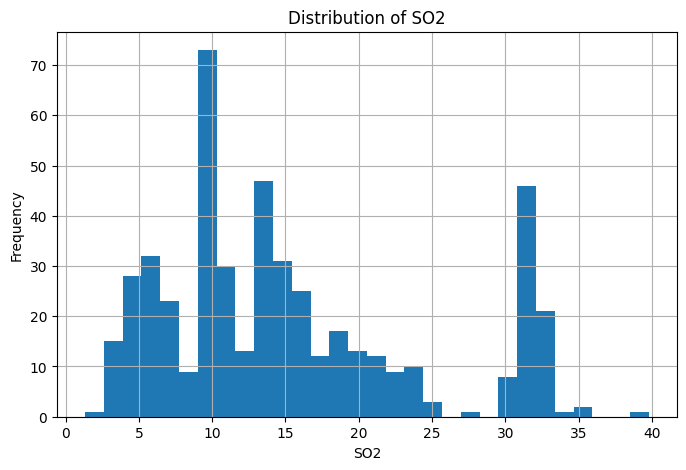

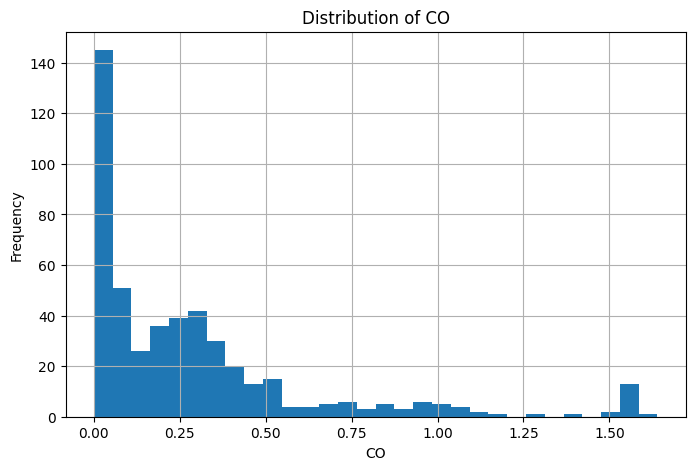

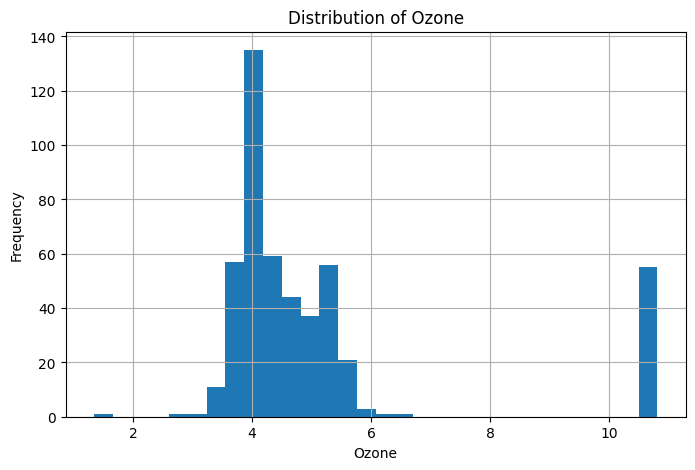

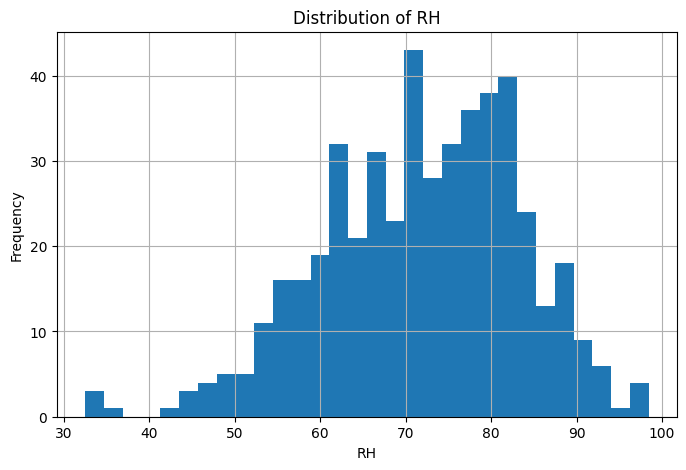

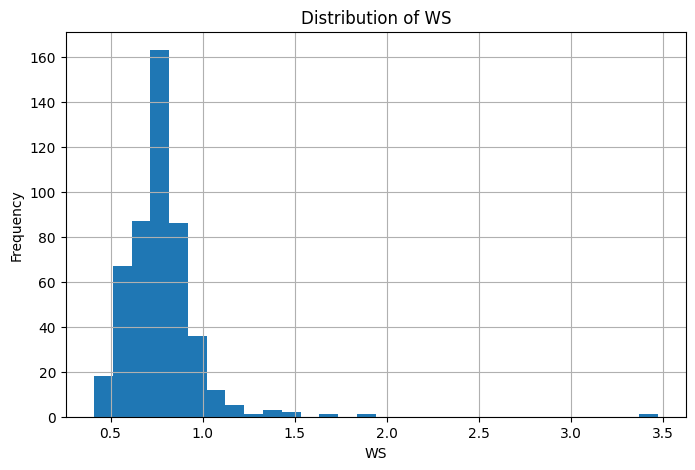

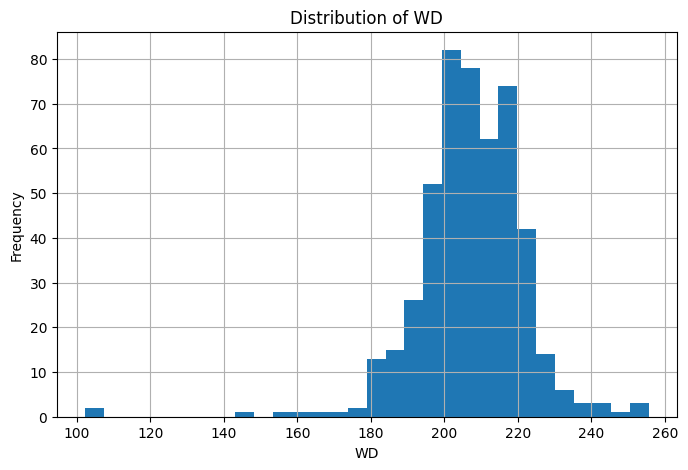

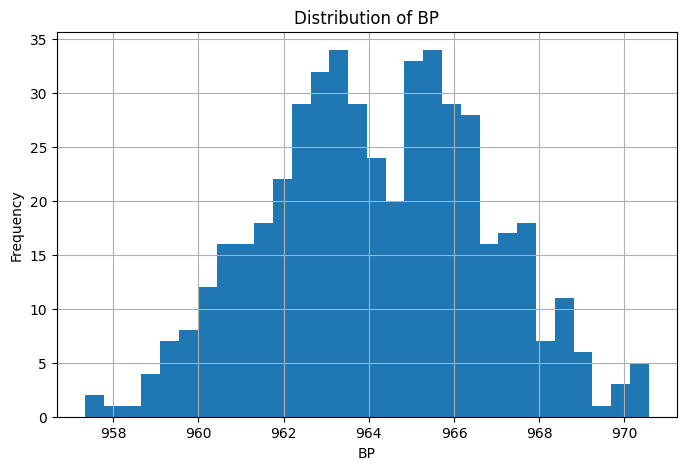

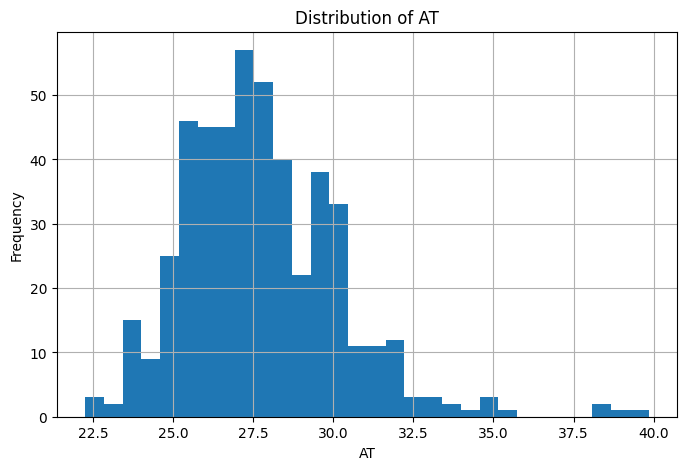

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_air_quality.csv')
data['From Date'] = pd.to_datetime(data['From Date'])

for col in data.columns[1:]:  # Skip Date
    plt.figure(figsize=(8, 5))
    data[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.close()

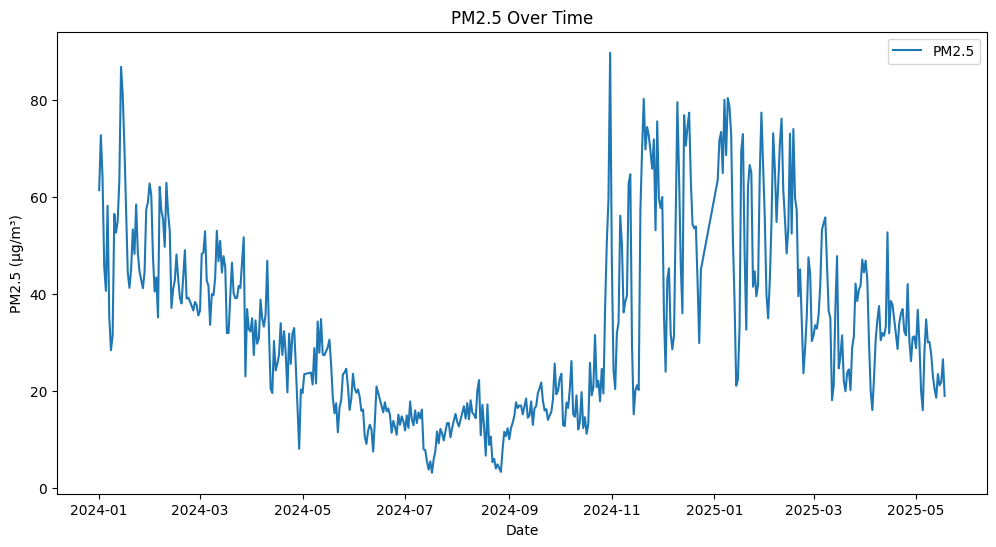

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data['From Date'], data['PM2.5'], label='PM2.5')
plt.title('PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()
plt.close()

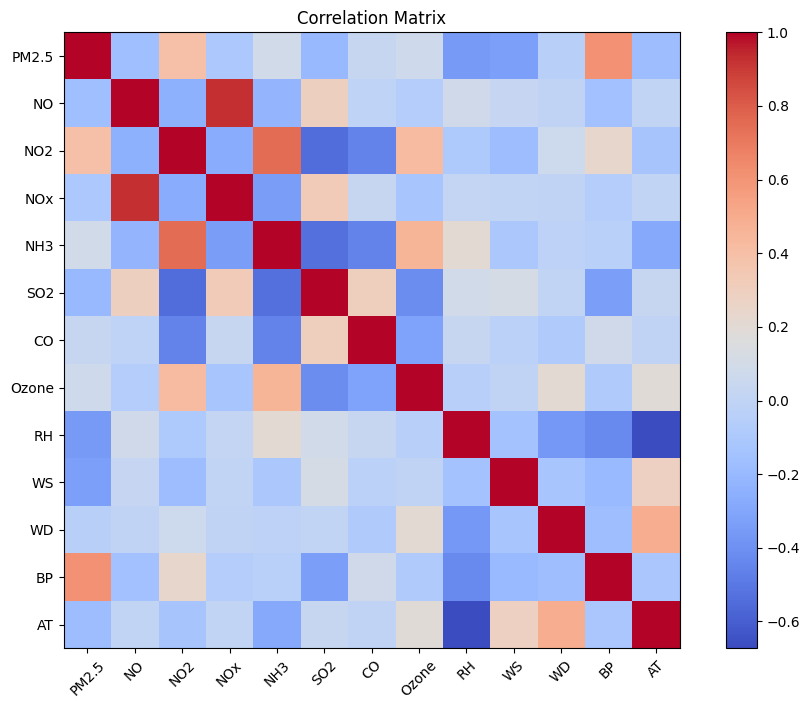

In [33]:
correlation_matrix = data.drop('From Date', axis=1).corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()
plt.close()

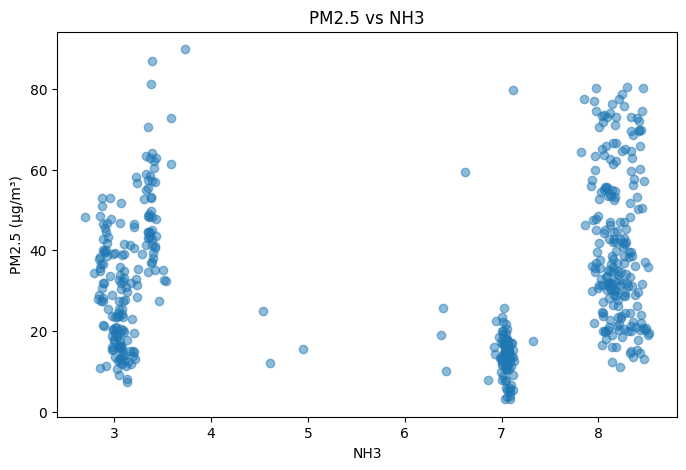

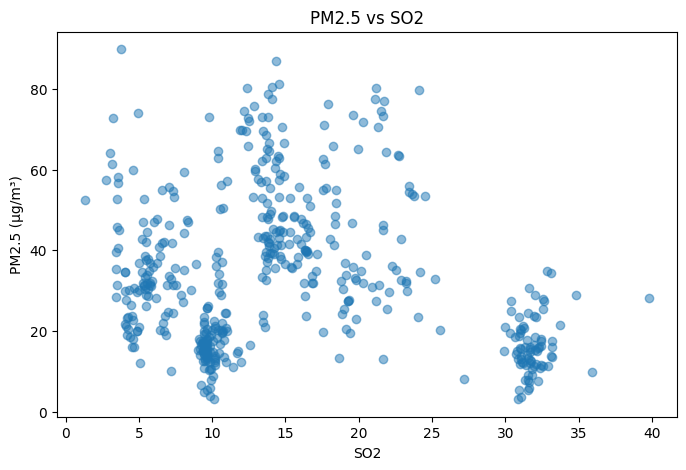

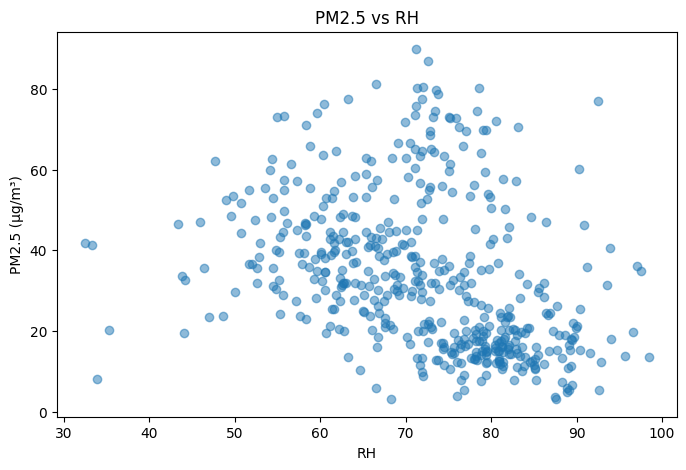

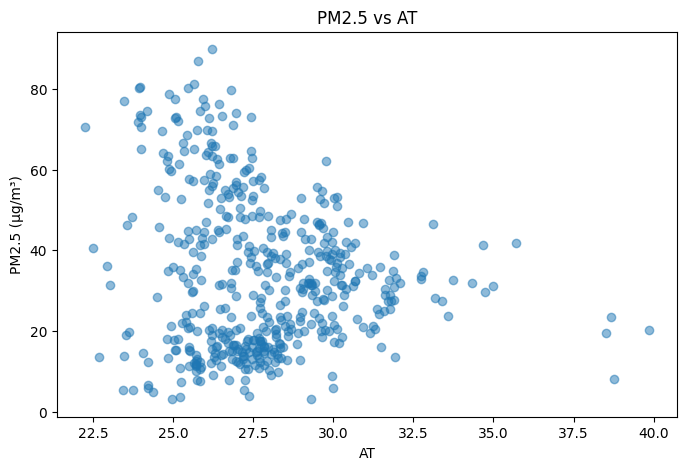

In [34]:
for col in ['NH3', 'SO2', 'RH', 'AT']:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[col], data['PM2.5'], alpha=0.5)
    plt.title(f'PM2.5 vs {col}')
    plt.xlabel(col)
    plt.ylabel('PM2.5 (µg/m³)')
    plt.show()
    plt.close()

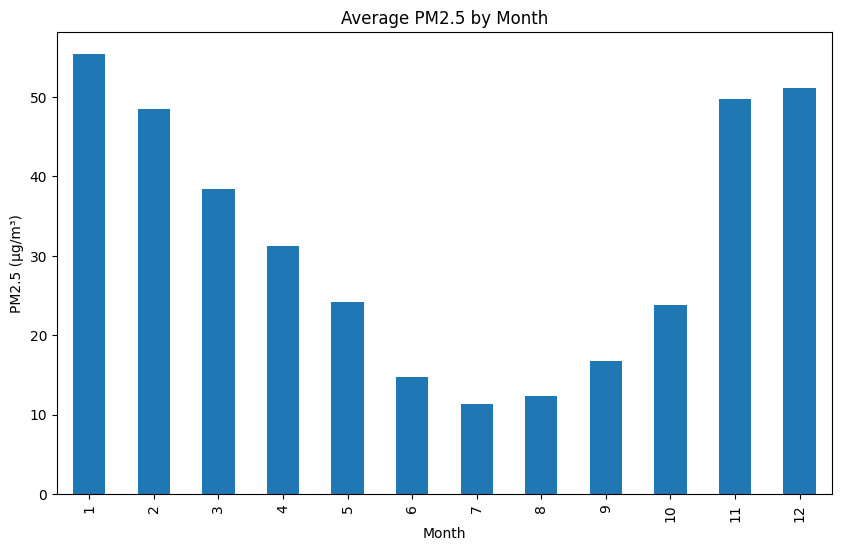

In [35]:
data['Month'] = data['From Date'].dt.month
monthly_pm25 = data.groupby('Month')['PM2.5'].mean()
plt.figure(figsize=(10, 6))
monthly_pm25.plot(kind='bar')
plt.title('Average PM2.5 by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()
plt.close()